# Topic - Flight fare prediction

## 1) Business case

## 2) Input dataset and Domain analysis

### 2.1 Domain analysis - Analysis of the dataset's features

### 2.2 Import the required libraries

In [1]:
import numpy as np  # Import numpy for array operations
import pandas as pd  # Import pandas for data manipulation
import statsmodels.api as sm  # Import statsmodels for statistical modeling

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data

from sklearn.datasets import make_regression  # Import make_regression to generate synthetic data for regression
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for ensemble modeling
from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation
from sklearn.model_selection import RepeatedKFold  # Import RepeatedKFold for repeated k-fold cross-validation
from matplotlib import pyplot  # Import pyplot for plotting
from numpy import mean  # Import mean from numpy for calculating means
from numpy import std  # Import std from numpy for calculating standard deviations
from xgboost import XGBRegressor  # Import XGBRegressor for XGBoost modeling
# from lightgbm import LGBMRegressor  # Import LGBMRegressor for LightGBM modeling
from catboost import CatBoostRegressor  # Import CatBoostRegressor for CatBoost modeling
from sklearn.linear_model import LinearRegression  # Import LinearRegression for linear modeling

from sklearn.datasets import make_regression  # Import make_regression to generate synthetic data for regression
from keras.models import Sequential  # Import Sequential for creating a sequential model in Keras
from keras.layers import Dense  # Import Dense for creating fully connected layers in Keras

from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for standardization
from tensorflow.keras import models  # Import models from TensorFlow Keras for building models
from tensorflow.keras import layers  # Import layers from TensorFlow Keras for building layers

##### 2.2 Libraries and their functionalities
1) Numpy                  - for statistical calculations like mean, median etc.,
2) Pandas                 - for dataset processing
3) Matplotlib and Seaborn - for data visualization
4) Regex                  - for handling and parsing the data
5) datetime and calendar  - for handling date parameter
6) Warnings               - to filter warning messages

### 2.3 Import the dataset

In [3]:
flight_data_eda = pd.read_csv("/Users/rajatsood/Downloads/Data_Train.csv")  # Read the CSV file for exploratory data analysis
flight_data_ml = pd.read_csv("/Users/rajatsood/Downloads/Data_Train.csv")  # Read the CSV file for machine learning analysis


##### 2.3 Note

1) Two dataframes are created for easier data analysis and model creation
2) Dataframe flight_data_eda will be used for the exploratary data analysis
3) Dataframe flight_data_ml will be used for the model creation

### 2.4 View sample data

In [4]:
flight_data_eda  # View the sample data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


##### 2.4 Inference

1) Input dataset has 10683 rows
2) We have 11 features of which "Price" is the dependent variable

# Data Preprocessing
Data Cleaning: Handling missing values, dealing with outliers, and addressing any inconsistencies or errors in the data.

Data Integration: Combining data from multiple sources into a coherent dataset.

Data Transformation: Normalizing or standardizing the data to ensure that it falls within a specific range, often to make different features comparable.

Feature Selection: Identifying and selecting the most relevant features for the model to improve efficiency and reduce overfitting.

Feature Engineering: Creating new features or transforming existing features to improve the performance of the model.

Data Reduction: Reducing the dimensionality of the data using techniques such as principal component analysis (PCA) or feature extraction.

Data Discretization: Converting continuous data into discrete form.

Handling Categorical Data: Converting categorical data into a format that can be easily interpreted by machine learning algorithms.

Splitting the Data: Dividing the dataset into training and testing sets to evaluate the model's performance.

Normalization and Scaling: Adjusting the scale of the data to ensure that different features have similar ranges.

Handling Imbalanced Data: Addressing any class imbalances in the dataset to ensure that the model does not become biased towards the majority clas

## 3) Exploratory data analysis

### 3.1 General information about the dataset

In [5]:
flight_data_eda.info() # Display information about the DataFrame, including the data types and the presence of missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### 3.1 Inference

1) All predictors are of data type "object"
2) The predicted feature is of data type "integer"
3) Predictors "Route" and "Total_Stops" has one null value each

### 3.2 Describe the dataset and it's features

#### 3.2.1 Key description\statistics of features of datatype integer

In [6]:
flight_data_eda.describe() # Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's distribution


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##### 3.2.1 Inference

1) All rows have non-zero price
2) Minimum price is Rs.1759/- and the maximum price is Rs.79512/-

#### 3.2.2 Key description\statistics of features of datatype object

In [7]:
flight_data_eda.describe(include="O") # Generate descriptive statistics for categorical columns, including count, unique, top, and frequency

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


##### 3.2.2 Inference

There are
1) 12 unique Airline providers of which Jet Airways' data has 3849 rows
2) 44 unique date of journeys of which around 504 passengers flew on 18/05/2019
3) 5 unique departure cities of which Delhi has most number of data, around 4537 rows
4) 6 unique destination cities of which Cochin has the most number of data, around 4537 rows
5) 127 unique routes(1 route has null data and is not considered here).  Delhi to Cochin via Bombay(route DEL --> BOM --> COK) 
   is the most frequently used, around 2376 times
6) 222 unique departure timings and 1343 arrival timings
7) 368 unique durations of travel available of which the most frequent duration is 2h 50m
8) 4 unique total stops(1 total stop has null data and is not considered here).  Around 5625 rows of direct flight data 
   available
9) 10 unique additional info.  Around 8345 rows does not have these details captured

### 3.3 Check for duplicate data

In [8]:
flight_data_eda.duplicated().sum() # Count the number of duplicated rows in the DataFrame

220

##### 3.3 Inference

1) There are 220 duplicate rows available.  They should be removed in the data pre-processing step

### 3.4 Data visualization and analysis

#### 3.4.1 Univariate analysis

##### 3.4.1.1 Analysis via sweetviz library

In [9]:
# Import sweetviz library
import sweetviz as sv

In [10]:
flight_data_univar_rpt = sv.analyze(flight_data_eda)  # Generate a univariate report using Sweetviz for the exploratory data analysis


                                             |      | [  0%]   00:00 -> (? left)


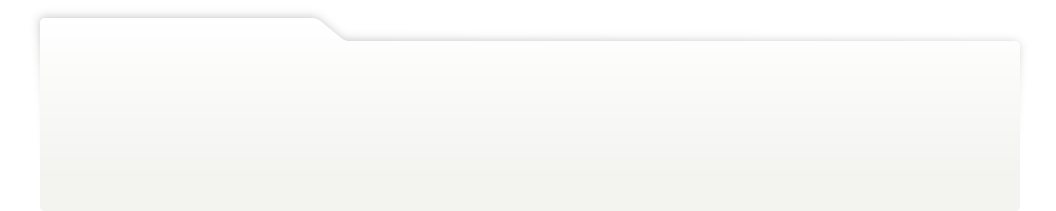
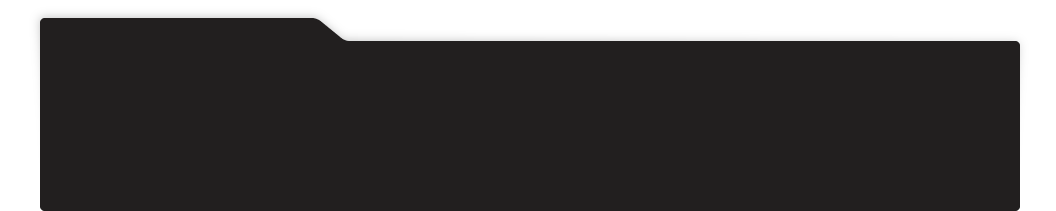
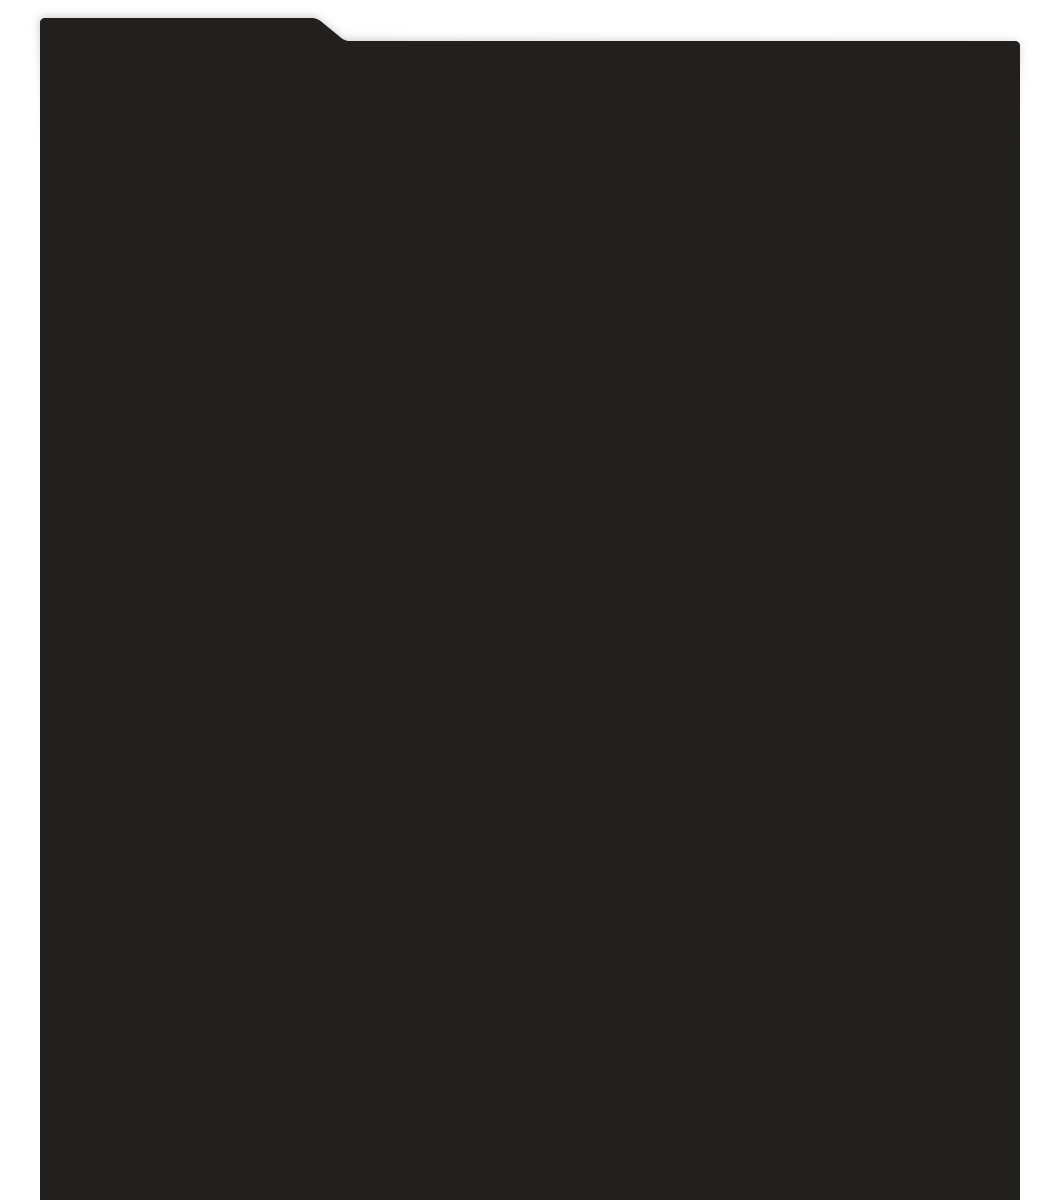
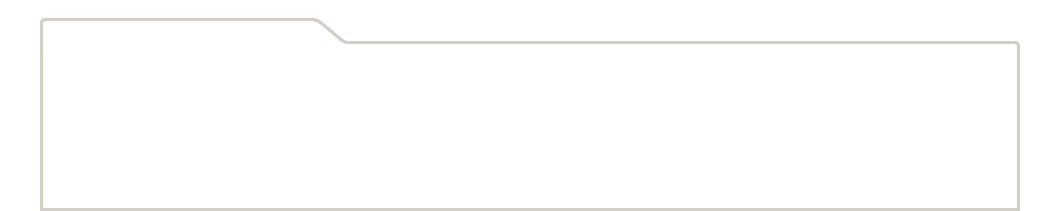
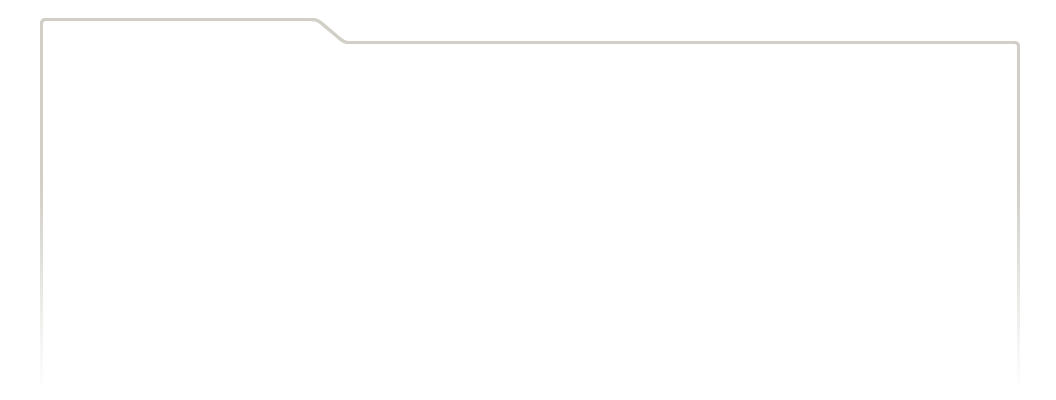
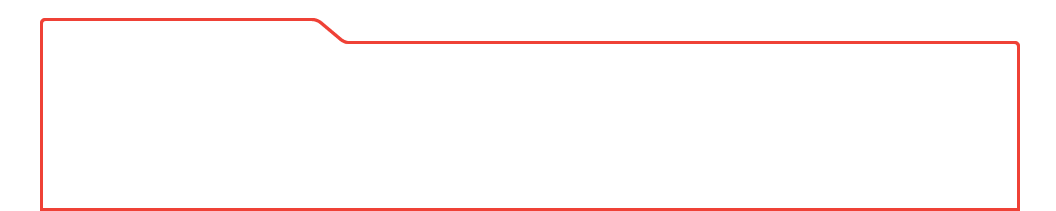
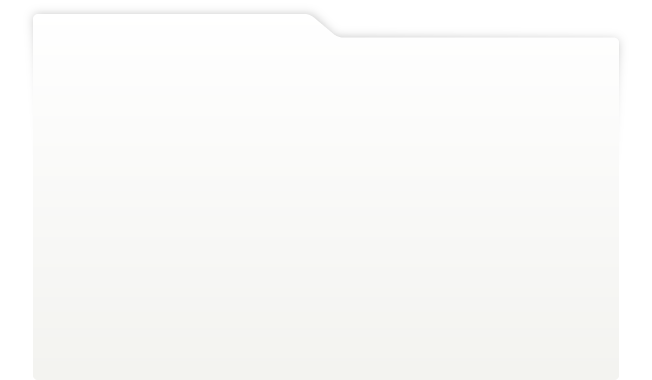
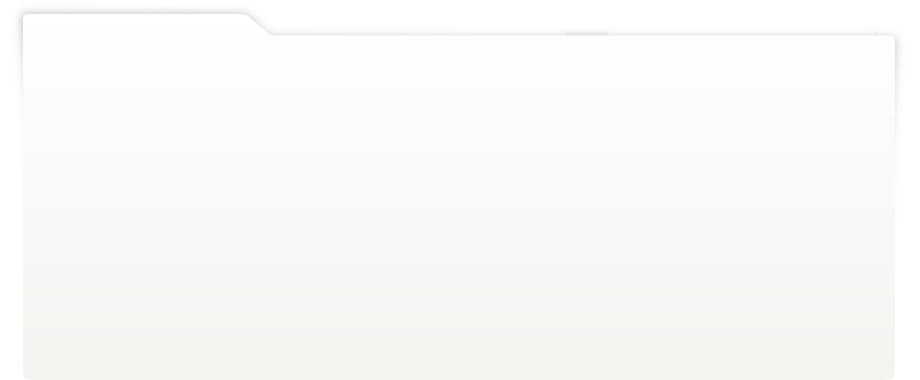
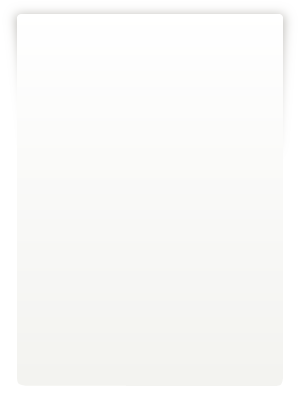
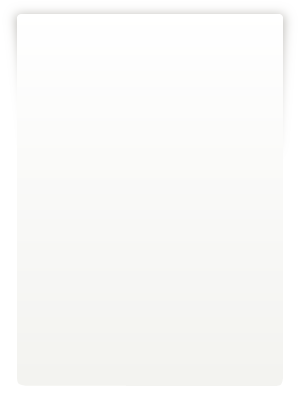
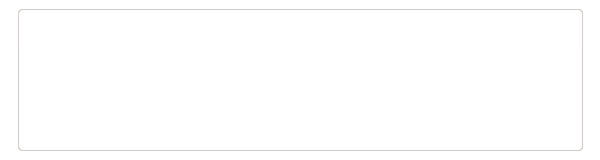
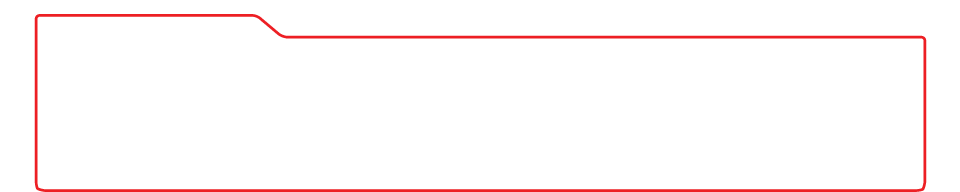
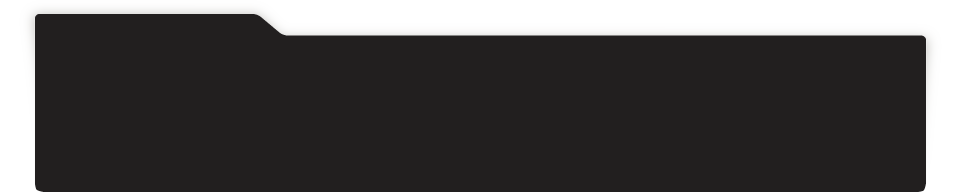
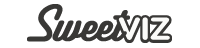
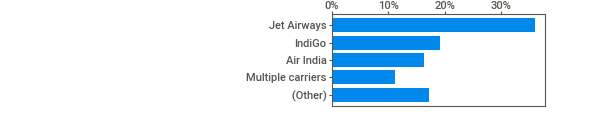
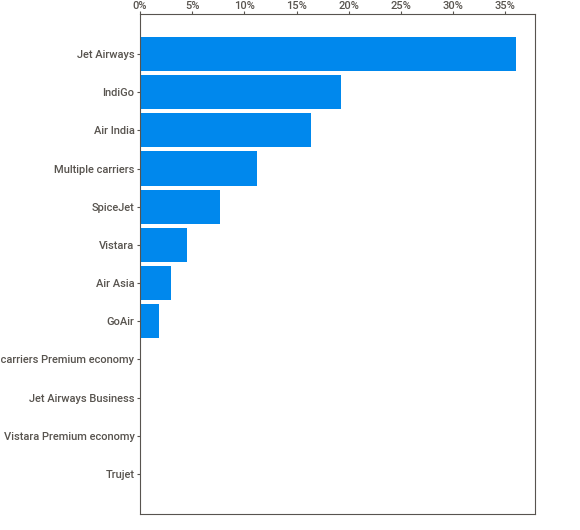
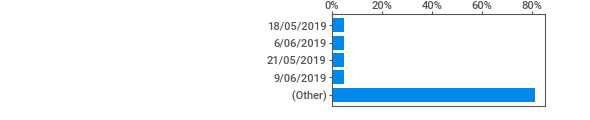
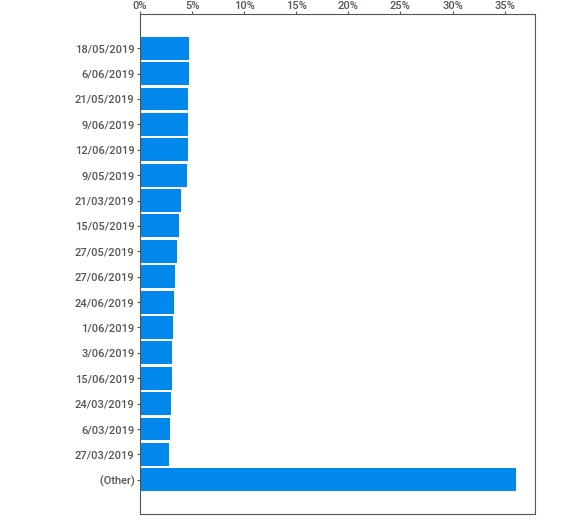
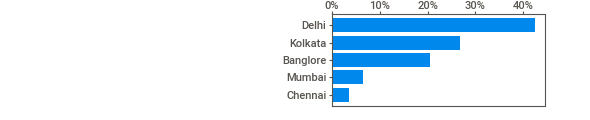
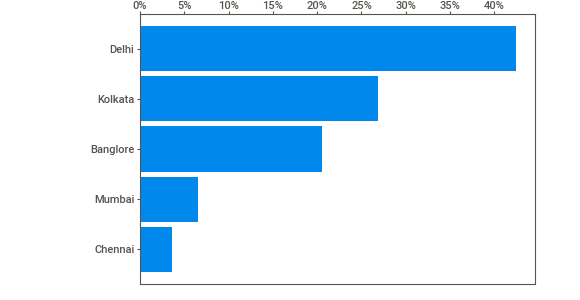
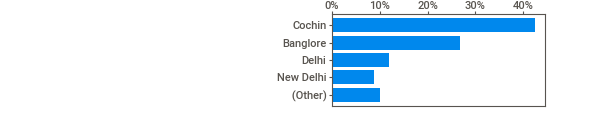
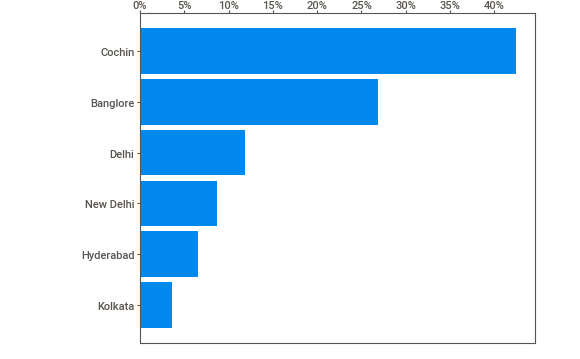
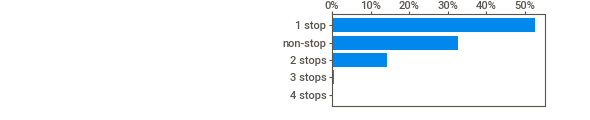
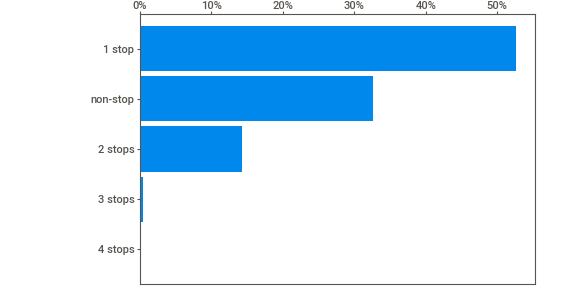
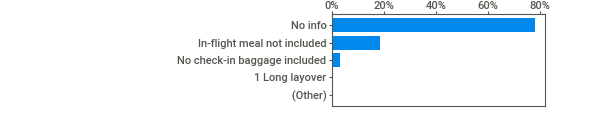
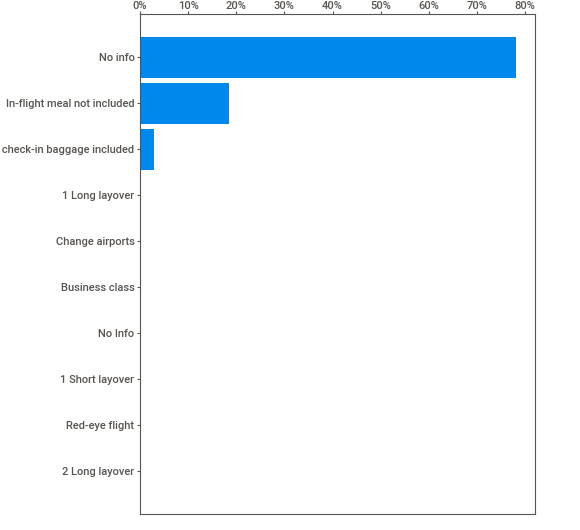
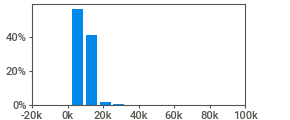
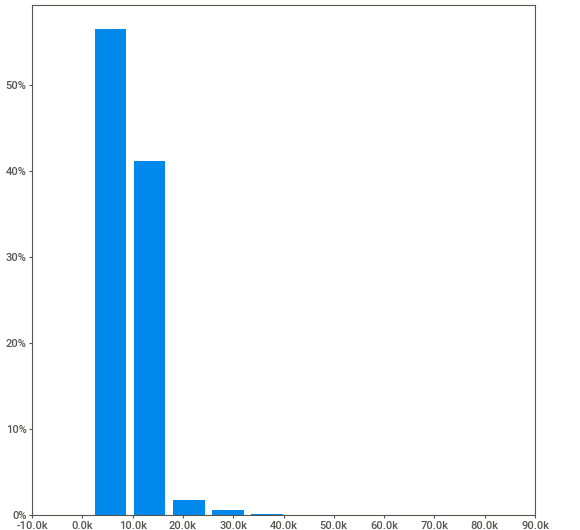
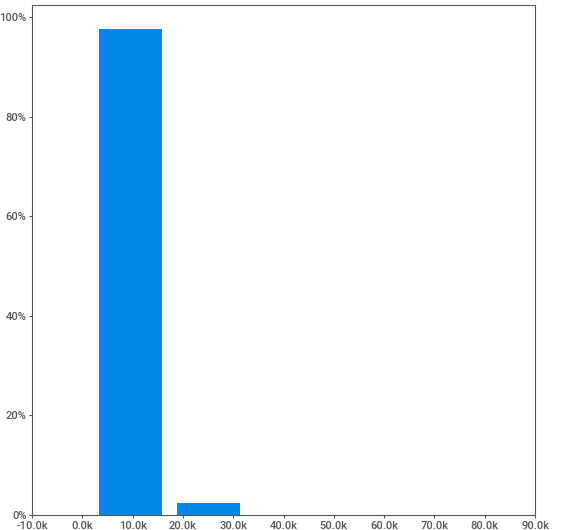
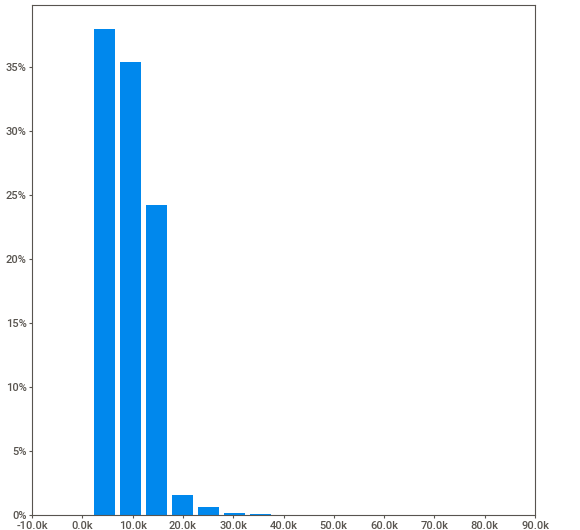
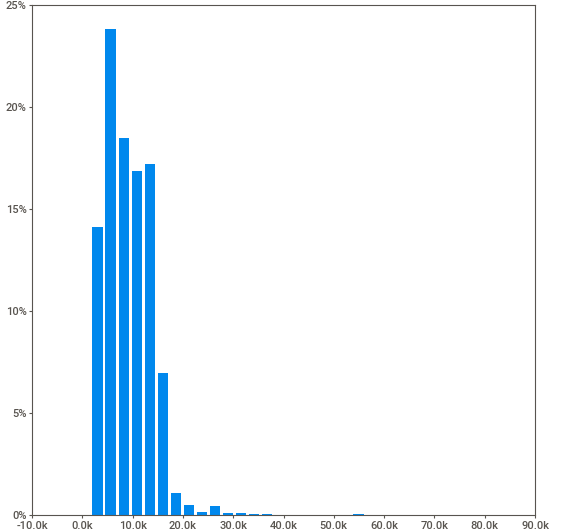
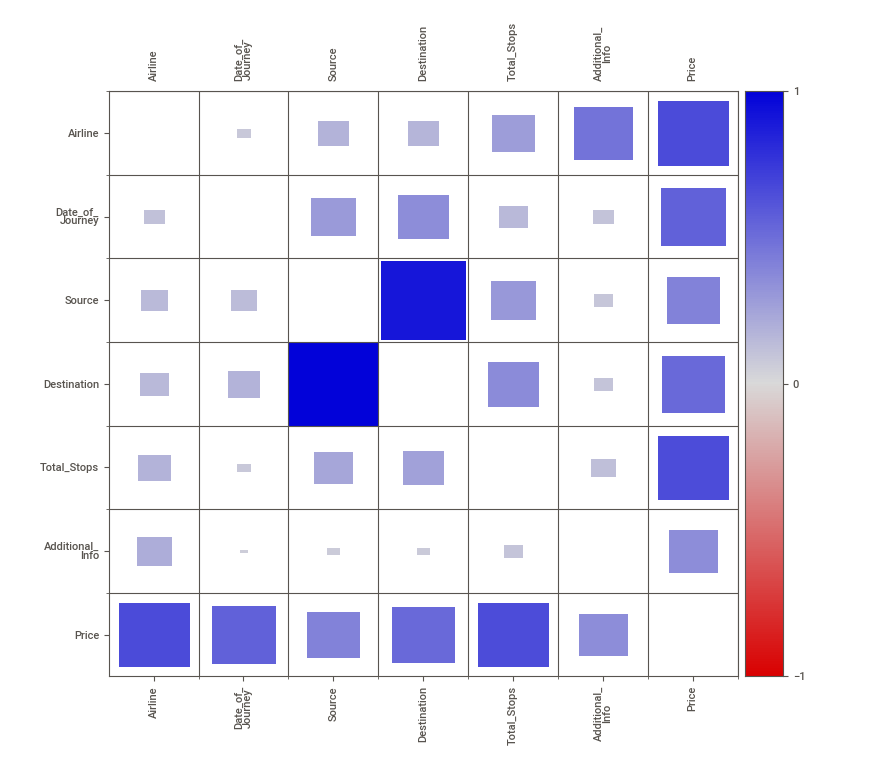
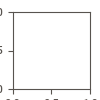

In [11]:
flight_data_univar_rpt.show_notebook() #displays the notebook containing the univariate analysis report for the flight dat

##### 3.4.1.1 Inference

1) There are 1870 distinct flight fare(price) available
2) The data for the predicted feature follows uniform distribution and is left skewed
3) Remaining inference are already covered in section 3.2.2

##### 3.4.1.2 Top 5 Airline by count

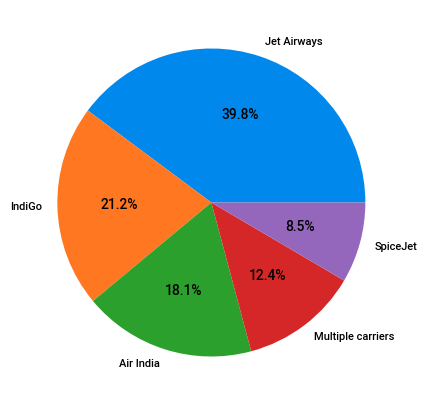

In [12]:
# Grouping the data based on the "Airline" column
flight_data_eda_airline_group = flight_data_eda.groupby(flight_data_eda["Airline"]).count()

# Sorting the grouped data based on the count of flights for each airline in descending order
flight_data_eda_airline_group_sorted = flight_data_eda_airline_group.sort_values(by=["Source"], ascending=False)

# Selecting the top 5 airlines based on the count of flights
flight_data_eda_airline_group_sorted

# Creating an empty list to store the labels of the top 5 airlines
flight_data_eda_airline_label = []

# Appending the top 5 airlines to the list of labels
for airline in flight_data_eda_airline_group_sorted.head(5).index:
    flight_data_eda_airline_label.append(airline)

# Creating a pie chart to visualize the distribution of flights among the top 5 airlines
plt.figure(figsize=(5,5))
plt.pie(flight_data_eda_airline_group_sorted["Source"].head(5), labels=flight_data_eda_airline_label, autopct="%.1f%%")
plt.show()


##### 3.4.1.2 Inference

1) Jet Airways tops the list with most number of flights operated followed by IndiGo, Air India,
   Multiple carriers(other airlines) and SpiceJet

##### 3.4.1.3 Top Departure cities by journey

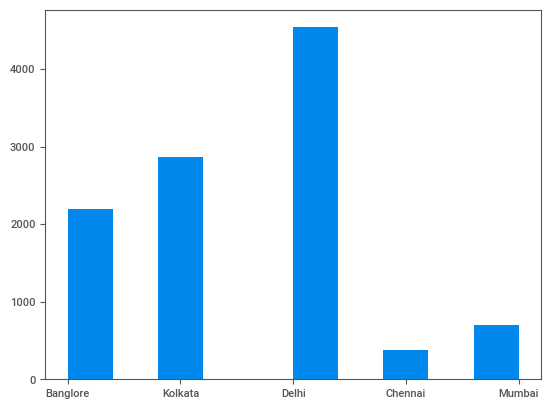

In [13]:
# Creating a histogram to visualize the distribution of flights based on the source
plt.hist(flight_data_eda["Source"])

# Displaying the histogram
plt.show()


##### 3.4.1.3 Inference

1) More number of flights were operated from Delhi followed by Kolkata, Bangalore, Mumbai and Chennai

##### 3.4.1.4 Top destination cities by journey

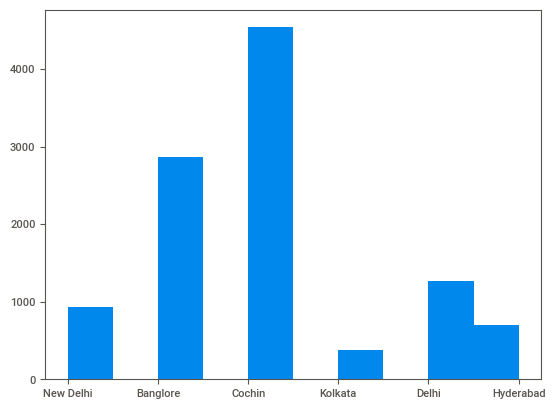

In [14]:
# Creating a histogram to visualize the distribution of flights based on the destination
plt.hist(flight_data_eda["Destination"])

# Displaying the histogram
plt.show()


##### 3.4.1.4 Inference

1) More number of flights had their destination city as Cochin followed by Bangalore, Delhi, New Delhi, Hyderabad and Kolkata

##### 3.4.1.5 Top 5 flight routes by number of journey

In [15]:
# Grouping the flight data based on the route
flight_data_eda_route_group = flight_data_eda.groupby(flight_data_eda["Route"]).count()

# Sorting the grouped data based on the count of sources in descending order
flight_data_eda_route_group_sorted = flight_data_eda_route_group.sort_values(by=["Source"], ascending=False)

# Displaying the top 5 routes based on the count of sources
flight_data_eda_route_group_sorted.head(5)


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Route,,,,,,,,,,
DEL → BOM → COK,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
BLR → DEL,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552
CCU → BOM → BLR,979,979,979,979,979,979,979,979,979,979
CCU → BLR,724,724,724,724,724,724,724,724,724,724
BOM → HYD,621,621,621,621,621,621,621,621,621,621


##### 3.4.1.5 Inference

1) Top 5 routes that had more number of journeys are given below in the order:
    
    DEL → BOM → COK
    
    BLR → DEL
    
    CCU → BOM → BLR
    
    CCU → BLR
    
    BOM → HYD

#### 3.4.2 Bivariate analysis

##### 3.4.2.1 Duration vs Price

In [16]:
# Function to convert duration in hours and minutes to total minutes
def dur_conv(duration):
    # Splitting the duration string into hours and minutes
    dur_split = re.split('[hm]', duration)
    # Initializing the total duration in minutes
    dur_in_min = 0
     # Looping through the split duration parts
    for dur in range(0,len(dur_split)):
        # Checking if the split part is not an empty string
        if dur_split[dur] != "":
            # If it is the first part (hours), convert it to minutes and add to the total duration
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
                 # If it is the second part (minutes), add it directly to the total duration
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
                # Return the total duration in minutes
    return dur_in_min

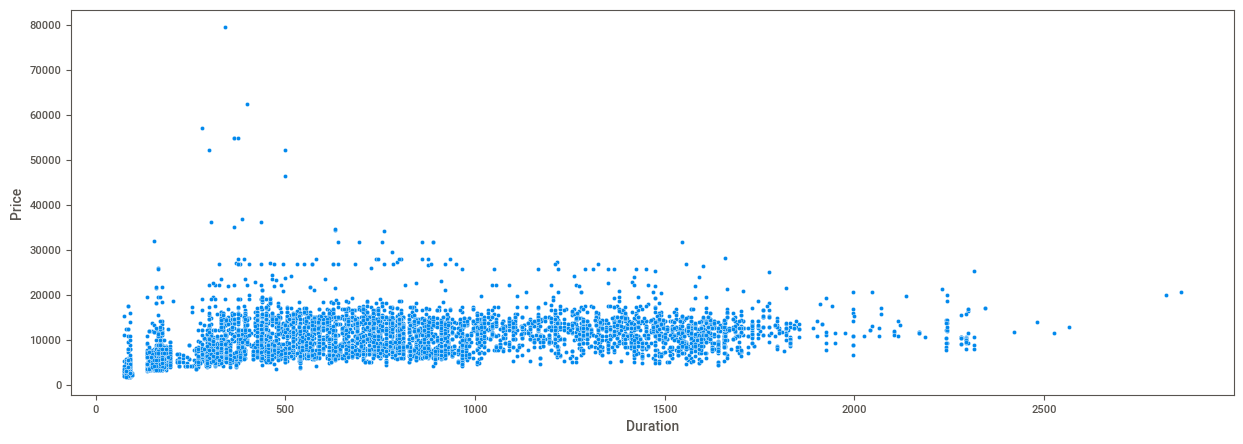

In [17]:
# Applying the 'dur_conv' function to convert the 'Duration' column values to total minutes
flight_data_eda["Duration"] = flight_data_eda["Duration"].apply(dur_conv)

# Creating a scatter plot to visualize the relationship between the 'Duration' and 'Price' columns
plt.figure(figsize=(15,5))
sns.scatterplot(x="Duration", y="Price", data=flight_data_eda)
plt.show()


##### 3.4.2.1 Inference

1) Flights with duration more than 1750 minutes(29 hours) usually charge high airfare.  Their average airfare starts
   from Rs.7500/- whereas flights with duration lesser than 1750 minutes(29 hours) have their average airface starting from
   lesser than Rs.7500/-
2) Occassional journeys with lesser duration were charged unusually high airfare like Rs.80,000/-, Rs.60,000/- etc.,

##### 3.4.2.2 Additional info vs Price

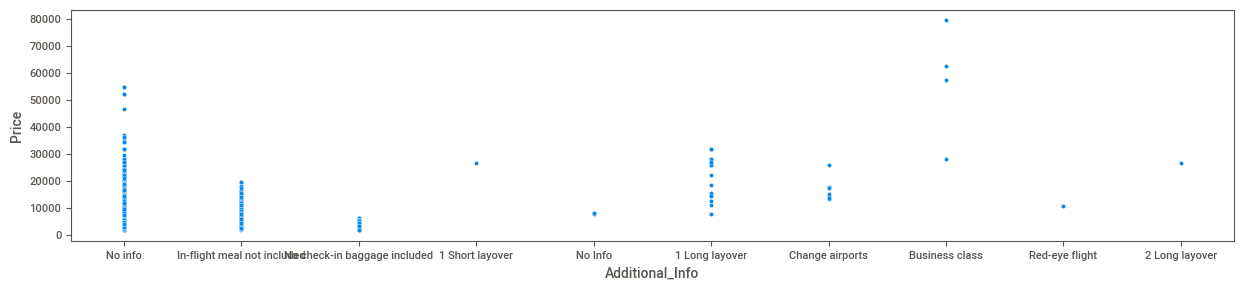

In [18]:
# Creating a figure with a specified size for the scatter plot
plt.figure(figsize=(15,3))

# Creating a scatter plot to visualize the relationship between the 'Additional_Info' and 'Price' columns
sns.scatterplot(x="Additional_Info", y="Price", data=flight_data_eda)

# Displaying the plot
plt.show()


##### 3.4.2.2 Inference

1) Business class journeys have the highest fare charged.  Their average airfare starts from around Rs.30,000/-
2) Travellers that need to change airports are charged relatively a higher airfare when compared with others

##### 3.4.2.3 Day of Jourmey vs Price

In [19]:
# Defining a function to extract the day of the week from a given date
def date_jour_day(date):
    # Converting the date string to a weekday index using the datetime library
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    # Returning the day name corresponding to the weekday index
    return (calendar.day_name[day])


In [20]:
# Applying the defined function to extract the day of the week from the 'Date_of_Journey' column
flight_data_eda["Date_of_Journey"] = flight_data_eda["Date_of_Journey"].apply(date_jour_day)
# Displaying the first few rows of the modified DataFrame
flight_data_eda.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


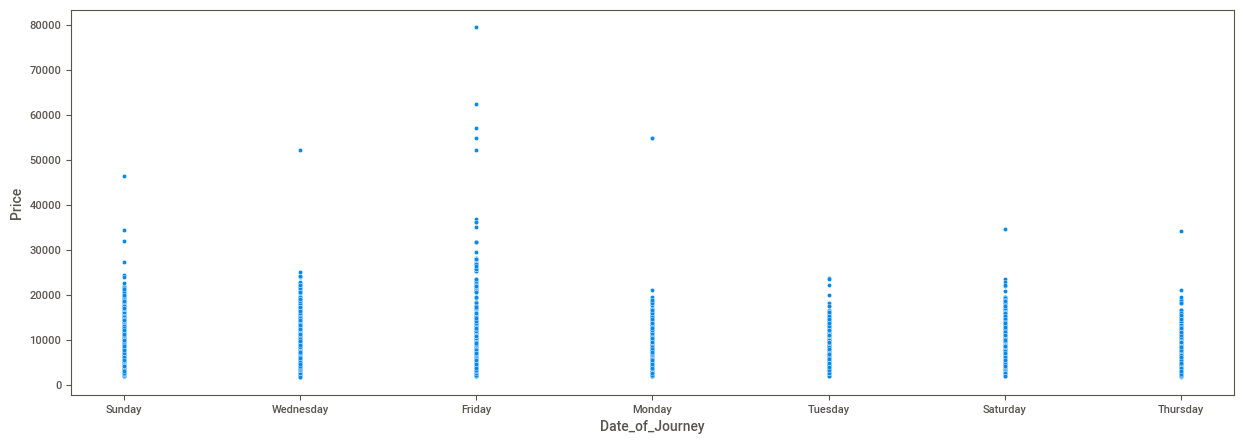

In [21]:
# Creating a scatterplot to visualize the relationship between 'Date_of_Journey' and 'Price'
plt.figure(figsize=(15,5))
# Using Seaborn's scatterplot function to plot the data
sns.scatterplot(x="Date_of_Journey", y="Price", data=flight_data_eda)
# Displaying the plot
plt.show()


##### 3.4.2.3 Inference

1) Flight fare is high during Friday followed by Sunday
2) There are occasional high flight fares during Monday, Wednesday, Thursday and Thursday
3) Flight fare is normal during Tuesday

## 4) Data pre-processing

### 4.1 Update the null value(based on 3.1 Inference)

In [22]:
# Displaying the information about the flight_data_ml DataFrame
flight_data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [23]:
# Filtering the flight_data_ml DataFrame based on specific conditions
flight_data_ml.loc[(flight_data_ml["Airline"] == "Air India") & 
                   (flight_data_ml["Source"] == "Delhi") & 
                   (flight_data_ml["Destination"] == "Cochin") & 
                   (flight_data_ml["Dep_Time"] == "09:45") & 
                   (flight_data_ml["Duration"] == "23h 40m") & 
                   (flight_data_ml["Price"] == 7480)]

# Filling missing values in the 'Route' column with a specific value
flight_data_ml.loc[flight_data_ml["Route"].isnull() == True, "Route"] = "DEL → MAA → COK"

# Filling missing values in the 'Total_Stops' column with a specific value
flight_data_ml.loc[flight_data_ml["Total_Stops"].isnull() == True, "Total_Stops"] = "1 stop"


In [24]:
# Filtering the flight_data_ml DataFrame based on specific conditions
flight_data_ml.loc[(flight_data_ml["Airline"]     == "Air India") &
                   (flight_data_ml["Source"]      == "Delhi") &
                   (flight_data_ml["Destination"] == "Cochin") &
                   (flight_data_ml["Dep_Time"]    == "09:45") &
                   (flight_data_ml["Duration"]    == "23h 40m") &
                   (flight_data_ml["Price"]       == 7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


In [102]:


# Since we have converted Date_of_Journey column into integers, now we can drop it as it is of no use.
if 'Date_of_Journey' in flight_data_ml.columns:
    flight_data_ml.drop(['Date_of_Journey'], axis=1, inplace=True)
    print(flight_data_ml)
else:
    print("Column 'Date_of_Journey' not found in the DataFrame.")



Column 'Date_of_Journey' not found in the DataFrame.


In [25]:

# Check the number of duplicate rows in the dataset
print(flight_data_ml.duplicated().sum(), "rows of duplicate data available")

# Fetch the duplicate rows from the dataset
flight_data_ml[flight_data_ml.duplicated()]

220 rows of duplicate data available


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [26]:
# Create a new DataFrame with duplicate rows removed
flight_data_ml_upd = flight_data_ml.drop_duplicates()


##### 4.2 Inference

1) Duplicate rows are removed

### 4.3 Convert Total_Stops from "categorical" to "numerical"

In [27]:
# Function to convert the 'Total_Stops' column values to numerical format
def stop_conv(stop):
    if stop == "1 stop":
        stop = 1
    elif stop == "2 stops":
        stop = 2
    elif stop == "3 stops":
        stop = 3
    elif stop == "4 stops":
        stop = 4
    else:
        stop = 0
    return stop

In [28]:
# Applying the stop_conv function to convert the 'Total_Stops' column values to numerical format
flight_data_ml_upd["Total_Stops"] = flight_data_ml_upd["Total_Stops"].apply(stop_conv)
flight_data_ml_upd #Display the new updated data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


##### 4.2 Inference

1) The categorical values in Total_Stops feature are converted to numerical values

### 4.3 Convert duration format from hours and minutes to minutes

In [29]:
#Function to convert duration format from hours and minutes to minutes
def dur_conv(duration):
    dur_split = re.split('[hm]', duration)
   
    dur_in_min = 0
    
    for dur in range(0,len(dur_split)):
        if dur_split[dur] != "":
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
    return dur_in_min

In [30]:
# Applying the dur_conv function to convert the 'Duration' column values to minutes
flight_data_ml_upd["Duration"] = flight_data_ml_upd["Duration"].apply(dur_conv)
# Displaying the updated DataFrame after converting the 'Duration' column values
flight_data_ml_upd


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648


##### 4.3 Inference

1) Duration is conveted from hours and minutes format to minutes format

### 4.4 Convert Departure and Arrival timings to numerical values

In [31]:
# Function to convert Departure and Arrival timings to numerical values
 def dep_time_conv(time):
    dep_time_split = re.split('[:]', time)
        
    if ((dep_time_split[0] >= "00") and (dep_time_split[0] <= "06")):
        return (1)
    elif ((dep_time_split[0] > "06") and (dep_time_split[0] <= "12")):
        return (2)
    elif ((dep_time_split[0] > "12") and (dep_time_split[0] <= "18")):
        return (3)
    elif ((dep_time_split[0] > "18") and (dep_time_split[0] <= "23")):
        return (4)

In [32]:
# Applying the dep_time_conv function to convert the 'Dep_Time' column values to datetime format
flight_data_ml_upd["Dep_Time"] = flight_data_ml_upd["Dep_Time"].apply(dep_time_conv)
# Applying the dep_time_conv function to convert the 'Arrival_Time' column values to datetime format
flight_data_ml_upd["Arrival_Time"] = flight_data_ml_upd["Arrival_Time"].apply(dep_time_conv)
# Displaying the updated DataFrame after converting 'Dep_Time' and 'Arrival_Time' columns
flight_data_ml_upd


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,4,1,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,3,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2,1,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,3,4,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,3,4,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,4,4,150,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,4,4,155,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,2,2,180,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2,3,160,0,No info,12648


##### 4.4 Inference

1) Departure and Arrival timings are converted to numerical values

### 4.5 Convert Date of journey from "date format" to "day" format

In [33]:
# Function to convert Date of journey from "date format" to "day" format
def date_jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

In [34]:
# Applying the date_jour_day function to convert the 'Date_of_Journey' column values to extract day of the week
flight_data_ml_upd["Date_of_Journey"] = flight_data_ml_upd["Date_of_Journey"].apply(date_jour_day)
# Displaying the updated DataFrame after converting 'Date_of_Journey' column
flight_data_ml_upd


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,4,1,170,0,No info,3897
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,3,445,2,No info,7662
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,2,1,1140,2,No info,13882
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,3,4,325,1,No info,6218
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,3,4,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Tuesday,Kolkata,Banglore,CCU → BLR,4,4,150,0,No info,4107
10679,Air India,Saturday,Kolkata,Banglore,CCU → BLR,4,4,155,0,No info,4145
10680,Jet Airways,Saturday,Banglore,Delhi,BLR → DEL,2,2,180,0,No info,7229
10681,Vistara,Friday,Banglore,New Delhi,BLR → DEL,2,3,160,0,No info,12648


##### 4.5 Inference

1) Date of journey is converted from "date" format to "day" format

### 4.6 Convert remaining "categorical" values to "numerical" values

In [35]:
#Function to convert remaining categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [36]:
# Transforming 'Airline' column using the label encoder
flight_data_ml_upd["Airline"] = lab_enc.fit_transform(flight_data_ml_upd["Airline"])
# Transforming 'Source' column using the label encoder
flight_data_ml_upd["Source"] = lab_enc.fit_transform(flight_data_ml_upd["Source"])
# Transforming 'Destination' column using the label encoder
flight_data_ml_upd["Destination"] = lab_enc.fit_transform(flight_data_ml_upd["Destination"])
# Transforming 'Route' column using the label encoder
flight_data_ml_upd["Route"] = lab_enc.fit_transform(flight_data_ml_upd["Route"])
# Transforming 'Additional_Info' column using the label encoder
flight_data_ml_upd["Additional_Info"] = lab_enc.fit_transform(flight_data_ml_upd["Additional_Info"])
# Transforming 'Date_of_Journey' column using the label encoder
flight_data_ml_upd["Date_of_Journey"] = lab_enc.fit_transform(flight_data_ml_upd["Date_of_Journey"])

In [37]:
flight_data_ml_upd.head() # Displaying the first few rows of the updated flight data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,3,0,5,18,4,1,170,0,8,3897
1,1,6,3,0,84,1,3,445,2,8,7662
2,4,3,2,1,118,2,1,1140,2,8,13882
3,3,3,3,0,91,3,4,325,1,8,6218
4,3,0,0,5,29,3,4,285,1,8,13302


##### 4.2 Inference

1) Remaining "categorical" values are converted to "numerical" values

## 5) Dimensionality reduction

### 5.1 Split the input data into X and y

In [38]:
# Creating the feature set X by dropping the 'Price' column from flight_data_ml_upd
X = flight_data_ml_upd.drop(["Price"], axis=1)

# Creating the target variable y from the 'Price' column of flight_data_ml_upd
y = flight_data_ml_upd["Price"]


##### 5.1 Inference

1) Input data is split into X and y

### 5.2 Scale the predictors/values

In [39]:
# Importing MinMaxScaler from sklearn.preprocessing for feature scaling
from sklearn.preprocessing import MinMaxScaler 
# Creating an instance of MinMaxScaler

min_max_scl = MinMaxScaler()
# Transforming the data using MinMaxScaler
X_scl = min_max_scl.fit_transform(X)
# Creating a DataFrame from the scaled data
X_scl = pd.DataFrame(X_scl, columns = flight_data_ml_upd.columns[0:10])

In [40]:
# Concatenating the scaled feature data (X_scl) and the target variable (y) using pd.concat
flight_data_ml_upd_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
flight_data_ml_upd_scl #Disolay the updated data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.272727,0.500000,0.00,1.0,0.141732,1.000000,0.000000,0.034111,0.00,0.888889,3897
1,0.090909,1.000000,0.75,0.0,0.661417,0.000000,0.666667,0.132855,0.50,0.888889,7662
2,0.363636,0.500000,0.50,0.2,0.929134,0.333333,0.000000,0.382406,0.50,0.888889,13882
3,0.272727,0.500000,0.75,0.0,0.716535,0.666667,1.000000,0.089767,0.25,0.888889,6218
4,0.272727,0.000000,0.00,1.0,0.228346,0.666667,1.000000,0.075404,0.25,0.888889,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,0.000000,0.833333,0.75,0.0,0.503937,1.000000,1.000000,0.026930,0.00,0.888889,4107
10459,0.090909,0.333333,0.75,0.0,0.503937,1.000000,1.000000,0.028725,0.00,0.888889,4145
10460,0.363636,0.333333,0.00,0.4,0.141732,0.333333,0.333333,0.037702,0.00,0.888889,7229
10461,0.909091,0.000000,0.00,1.0,0.141732,0.333333,0.666667,0.030521,0.00,0.888889,12648


##### 5.2 Inference

1) The predictors are scaled as expected

### 5.3 Split the scaled values into training and testing data

In [70]:
from sklearn.model_selection import train_test_split as tts
# Splitting the data into training and testing sets using train_test_split from sklearn
X_train, X_test, y_train, y_test = tts(X_scl, y, test_size=0.2, random_state=9)

##### 5.3 Inference

1) Training and testing data are created

### 5.4 Feature selection

#### 5.4.1 Variance threshold method

In [42]:
# Importing the VarianceThreshold module from sklearn for feature selection
from sklearn.feature_selection import VarianceThreshold as vt

# Initializing the VarianceThreshold with a threshold of 0.1
var_thr = vt(threshold=0.1)

# Fitting the VarianceThreshold to the training data
var_thr.fit(X_train)

# Printing the selected features based on the threshold
print(var_thr.get_support())


[False  True False False False  True  True False False False]


##### 5.4.1 Inference

1) 7 features can be removed as per the output.  But, we cannot remove 7 out of 10 predictors

#### 5.4.2 Correlation coefficient method

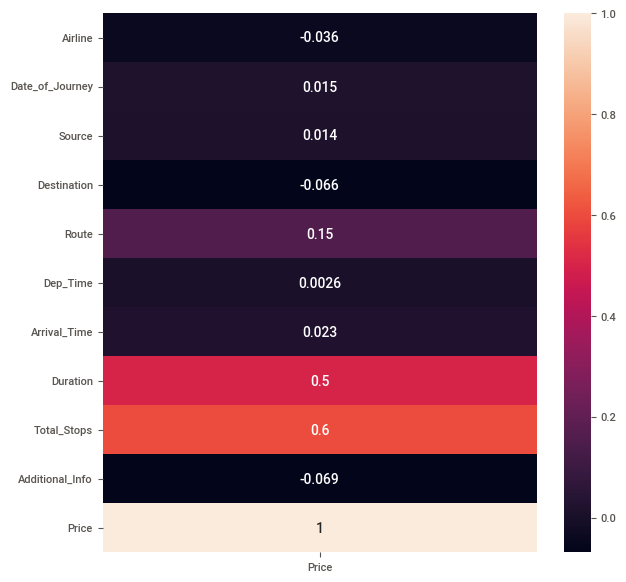

In [43]:
# Creating a figure for the heatmap with a size of 7x7
plt.figure(figsize=(7,7))
# Creating a heatmap of the correlation between features and the target variable "Price" in flight_data_ml_upd_scl
sns.heatmap(flight_data_ml_upd_scl.corr()[["Price"]], annot=True)
# Displaying the plot
plt.show()


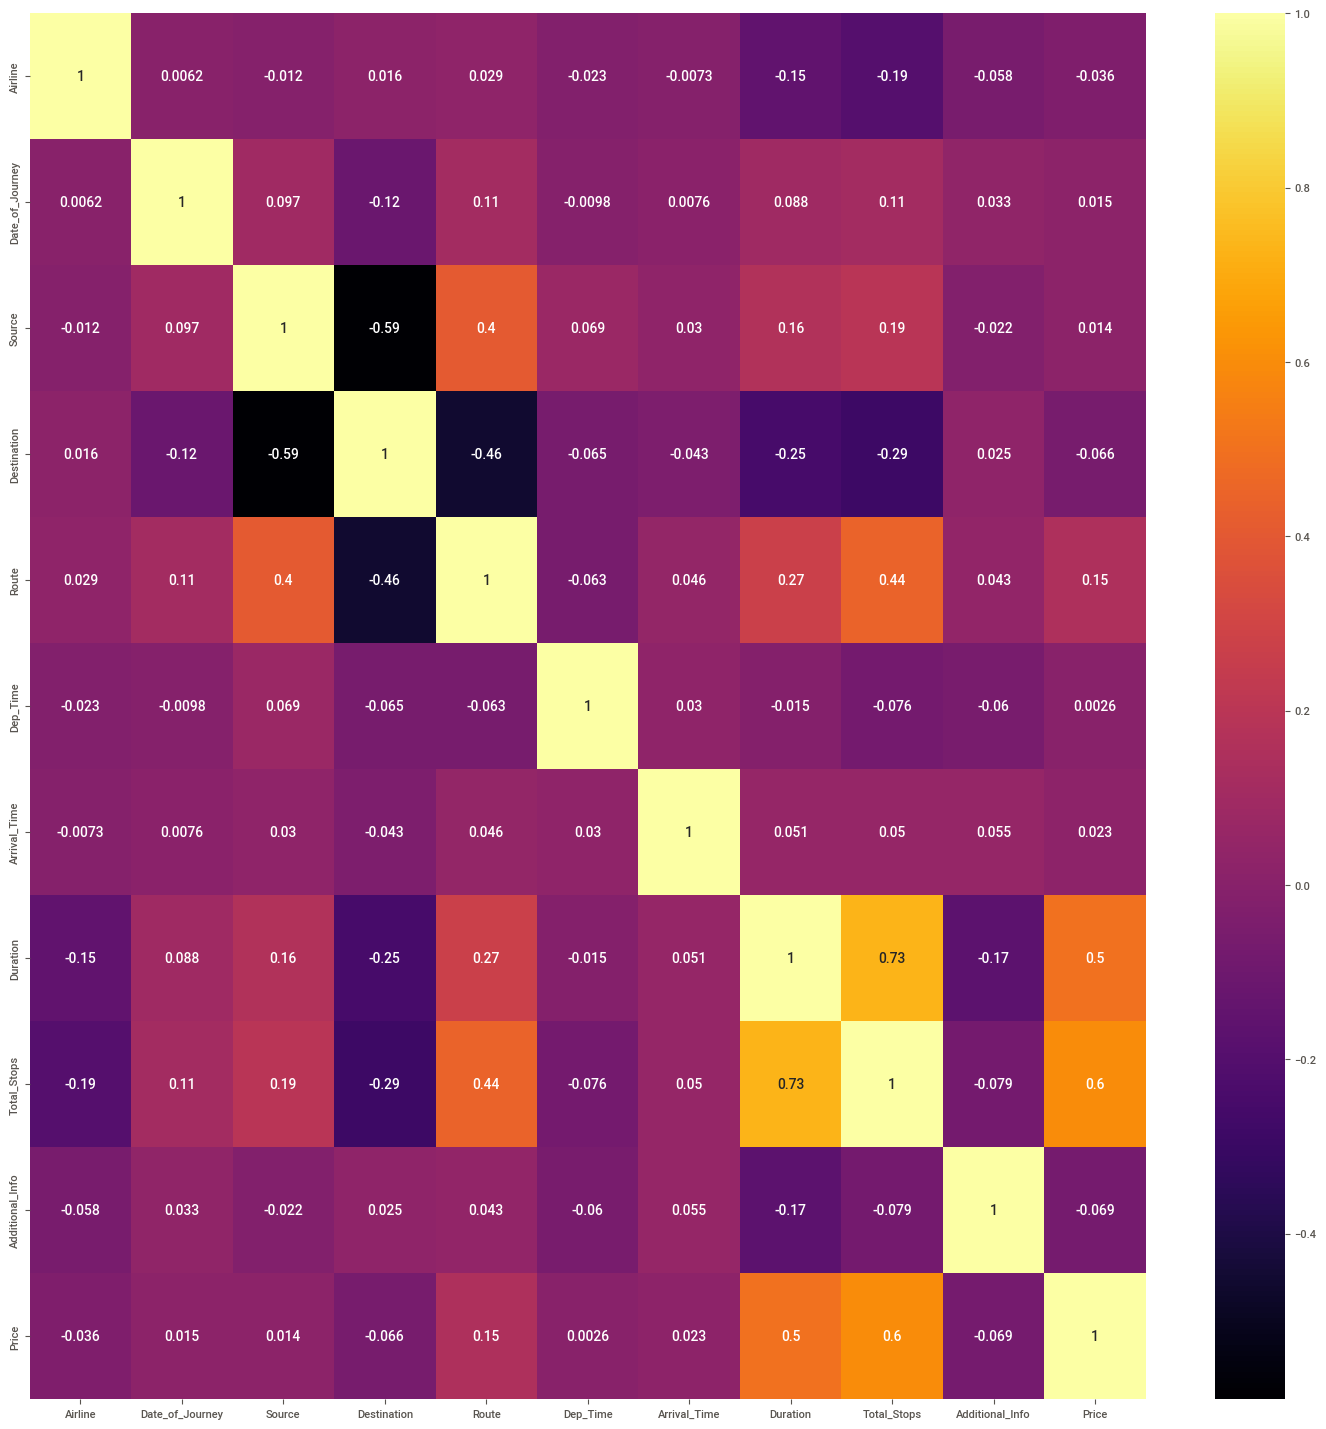

In [168]:
# Finds correlation between Independent and dependent attributes
# Creating a figure for the heatmap with a size of 18x18
plt.figure(figsize=(18, 18))
# Creating a heatmap of the correlation between all the attributes in flight_data_ml_upd_scl
sns.heatmap(flight_data_ml_upd_scl.corr(), annot=True, cmap="inferno")
# Displaying the plot
plt.show()

##### 5.4.2 Inference

1) No siginificant correlation of any predictor with the dependent variable.  We need not remove any predictor

#### 5.4.3 Duplicate features elimination method

In [50]:
# Installing the fast_ml package using pip
!pip install fast_ml

# Importing the necessary functions from the fast_ml package
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

# Calling the get_duplicate_features function on the flight_data_ml_upd_scl dataset
get_duplicate_features(flight_data_ml_upd_scl)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.0 MB/s eta 0:00:00


,Desc,feature1,feature2


##### 5.4.3 Inference

1) No duplicate features are present.  We need not remove any predictor

#### 5.4.4 Information gain method

In [45]:
# Importing the necessary modules for feature selection
from sklearn.feature_selection import mutual_info_regression
# Initializing an empty list to store the results
flight_data_ml_upd_scl_dep_list = []
# Iterating over a range of random states
for rand_stat in range(0,11):
     # Calculating mutual information between features and the target variable
    flight_data_ml_upd_scl_dep = mutual_info_regression(X_scl, y, random_state=rand_stat)
     # Creating a DataFrame from the mutual information values
    flight_data_ml_upd_scl_dep_df = pd.DataFrame(flight_data_ml_upd_scl_dep, columns=['Dependence'], index=X_scl.columns)
    # Filtering out features with zero dependence
    flight_data_ml_upd_scl_dep_df_col = flight_data_ml_upd_scl_dep_df[flight_data_ml_upd_scl_dep_df['Dependence'] == 0]
    # Appending the results to the list
    flight_data_ml_upd_scl_dep_list.append([rand_stat, flight_data_ml_upd_scl_dep_df_col.index])
# Displaying the final list
flight_data_ml_upd_scl_dep_list

[[0, Index([], dtype='object')],
 [1, Index([], dtype='object')],
 [2, Index([], dtype='object')],
 [3, Index([], dtype='object')],
 [4, Index([], dtype='object')],
 [5, Index([], dtype='object')],
 [6, Index([], dtype='object')],
 [7, Index([], dtype='object')],
 [8, Index([], dtype='object')],
 [9, Index([], dtype='object')],
 [10, Index([], dtype='object')]]

##### 5.4.4 Inference

1) No predictor should be removed

##### 5.4.5 Chi2 method is not required as the number of features are smaller

#### 5.4.6 Feature importance method

In [48]:
# Importing the necessary modules for feature selection and model building
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Initializing the model for feature selection
tb_model = SelectFromModel(RandomForestRegressor(n_estimators=20, random_state=9))

# Fitting the model on the training data
tb_model.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestRegressor(n_estimators=20,
                                                random_state=9))

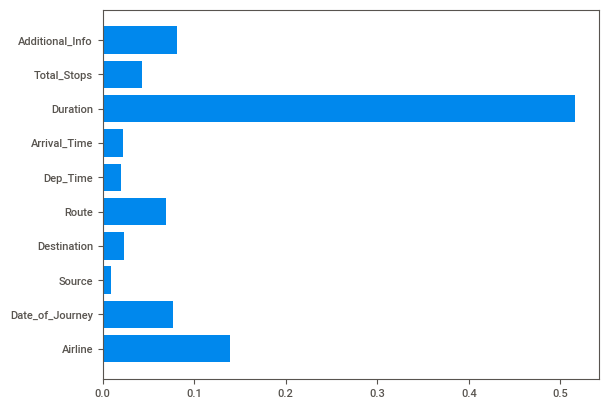

In [49]:
# Creating a horizontal bar plot to visualize feature importances
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
# Displaying the plot
plt.show()


##### 5.4.6 Inference

1) Feature "Duration" alone is shows as the important feature.  Hence, we need not eliminate any predictor/feature

#### 5.4.7 PCA is not required as the number of features is too small

## 6) Model selection and creation

##### Note:

1) Distance based algorithms like Linear regression, KNN and SVM use the scaled values
2) Tree based algorithms like Decision Tree, Random Forest, Gradient boosting, Extreme gradient boosting and
   Artificial Neural Network algorithm use the actual values

#### 6.1 Import the metrics from the library

In [51]:
from sklearn.metrics import r2_score  # Importing r2 score metric
from sklearn.metrics import mean_squared_error  # Importing mean squared error metric
from sklearn.metrics import mean_absolute_error  # Importing mean absolute error metric


#### 6.2 Note Testing data dimensions for the calculation of adjusted r2 score

In [52]:
X_test_rows = X_test.shape[0]  # Number of rows in the test set
X_test_cols = X_test.shape[1]  # Number of columns in the test set


In [53]:
print(X_test.shape)  # Print the shape of the test set
print(X_test_rows)  # Print the number of rows in the test set
print(X_test_cols)  # Print the number of columns in the test set


(2093, 10)
2093
10


# Machine Learning Techniques
### 6.3 Linear Regression


In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # Initialize the Linear Regression model
lin_reg.fit(X_train, y_train)  # Fit the model on the training data
y_pred_lin_reg = lin_reg.predict(X_test)  # Make predictions on the test data

r2_sco_lin_reg = r2_score(y_test, y_pred_lin_reg)  # Calculate the R-squared score
print(r2_sco_lin_reg)  # Print the R-squared score

adj_r2_sco_lin_reg = 1-(1-r2_sco_lin_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)  # Calculate the adjusted R-squared score
print(adj_r2_sco_lin_reg)  # Print the adjusted R-squared score

mea_squ_err_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)  # Calculate the mean squared error
print(mea_squ_err_lin_reg)  # Print the mean squared error

mea_abs_err_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)  # Calculate the mean absolute error
print(mea_abs_err_lin_reg)  # Print the mean absolute error


0.41563436951732224
0.4153536943826044
12613482.281937584
2433.8822596831515


### Ridge Regression to enhance the R2 score 

In [133]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Example feature engineering
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Example of Ridge Regression with GridSearch for Hyperparameter Tuning
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_poly)

ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Use the best model from the grid search
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
X_test_poly = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)
y_pred = best_model.predict(X_test_scaled)

# Calculate performance metrics
r2_sco = r2_score(y_test, y_pred)
adj_r2_sco = 1 - (1 - r2_sco) * (X_test.shape[0] - X_test.shape[1]) / (X_test.shape[0] - X_test.shape[1] - 1)
mea_squ_err = mean_squared_error(y_test, y_pred)
mea_abs_err = mean_absolute_error(y_test, y_pred)

print(r2_sco)
print(adj_r2_sco)
print(mea_squ_err)
print(mea_abs_err)


0.5888852098627908
0.5886877483881812
8873877.673050268
2027.5398532116494


### 6.4 KNN

#### 6.4.1 Identify the optimum 'k' value

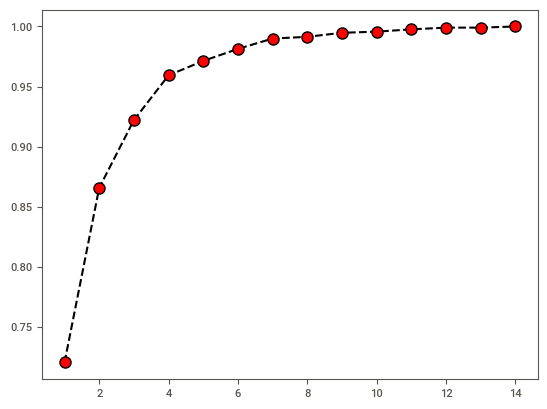

In [55]:
from sklearn.neighbors import KNeighborsRegressor

err_rate = []
for neighbor in range(1,15):
    knn_reg = KNeighborsRegressor(n_neighbors = neighbor)  # Initialize the K-Nearest Neighbors Regressor
    knn_reg.fit(X_train, y_train)  # Fit the model on the training data
    y_pred_knn_reg_init = knn_reg.predict(X_test)  # Make predictions on the test data
    err_rate.append(np.mean(y_pred_knn_reg_init != y_test))

plt.plot(range(1,15), err_rate, color='black', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize='8')  # Plot the error rate against the number of neighbors
plt.show()  # Display the plot


##### 6.4.1 Inference

1) The optimum value of 'k' is identified as 3

#### 6.4.2 Actual KNN model creation

In [71]:
knn_reg_final = KNeighborsRegressor(n_neighbors=3)  # Initialize the K-Nearest Neighbors Regressor
knn_reg_final.fit(X_train, y_train)  # Fit the model on the training data
y_pred_knn_reg = knn_reg_final.predict(X_test)  # Make predictions on the test data

r2_sco_knn_reg = r2_score(y_test, y_pred_knn_reg)  # Compute R-squared score
print(r2_sco_knn_reg)

adj_r2_sco_knn_reg = 1-(1-r2_sco_knn_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)  # Compute adjusted R-squared score
print(adj_r2_sco_knn_reg)

mea_squ_err_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)  # Compute mean squared error
print(mea_squ_err_knn_reg)

mea_abs_err_knn_reg = mean_absolute_error(y_test, y_pred_knn_reg)  # Compute mean absolute error
print(mea_abs_err_knn_reg)  # Print mean absolute error


0.6877772449325144
0.6876272820338268
6739301.532515792
1438.9132027392895


### 6.5 SVM

#### 6.5.1 Identification of optimum hyper parameters

In [72]:
from sklearn.svm import SVR  # Import Support Vector Regressor
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning

param_grid = {'C': [0.001, 0.01, 0.1, 1, 2],  # Define a grid of C values for the SVM
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1]  # Define a grid of gamma values for the SVM
             }

svr_hpt = SVR()  # Initialize the Support Vector Regressor
grid = GridSearchCV(svr_hpt, param_grid, refit=True, verbose=1, scoring='r2', cv=5)  # Perform grid search with 5-fold cross-validation

grid.fit(X_scl,y)  # Fit the model with the standardized data


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=1)

In [74]:
# Best hyper parameters for SVM
print(grid.best_estimator_)

SVR(C=2, gamma=1)


##### 6.5.1 Inference

1) The optimum hyper parameters are C=2, gamma=1

#### 6.5.2 Actual SVM model creation

In [75]:
svm_reg = SVR(C=2, gamma=1)  # Initialize the Support Vector Regressor with specific hyperparameters
svm_reg.fit(X_train, y_train)  # Fit the Support Vector Regressor on the training data
y_pred_svm_reg = svm_reg.predict(X_test)  # Predict the target values using the trained model


In [76]:
r2_sco_svm_reg = r2_score(y_test, y_pred_svm_reg)  # Compute the R2 score between the predicted and the true target values
print(r2_sco_svm_reg)

adj_r2_sco_svm_reg = 1-(1-r2_sco_svm_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)  # Compute the adjusted R2 score using the formula
print(adj_r2_sco_svm_reg)

mea_squ_err_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)  # Calculate the mean squared error between the true and predicted target values
print(mea_squ_err_svm_reg)

mea_abs_err_svm_reg = mean_absolute_error(y_test, y_pred_svm_reg)  # Calculate the mean absolute error between the true and predicted target values
print(mea_abs_err_svm_reg)


0.06340841690492682
0.06295856503984754
20216249.420801226
3283.14978585977


#### 6.6 Split actual values for Tree based and Neural network algorithms

In [77]:
 # Split the data into training and testing sets using a test size of 20% and a random state of 9
X_train_act, X_test_act, y_train_act, y_test_act = tts(X, y, test_size=0.2, random_state=9)

#### 6.7 Note Testing data dimensions for the calculation of adjusted r2 score

In [78]:
X_test_act_rows = X_test_act.shape[0]  # Number of rows in the X_test_act dataset
X_test_act_cols = X_test_act.shape[1]  # Number of columns in the X_test_act dataset

print(X_test_act_rows)  # Print the number of rows in the X_test_act dataset
print(X_test_act_cols)  # Print the number of columns in the X_test_act dataset


2093
10


### 6.8 Decision Tree

#### 6.8.1 Identify the optimum hyper parameters

In [79]:
from sklearn.tree import DecisionTreeRegressor
param_grid_dec_tree = {
    "criterion": ['absolute_error', 'poisson', 'friedman_mse', 'squared_error'],  # Criterion for the DecisionTreeRegressor
    "splitter": ["best", "random"],  # The strategy used to choose the split at each node
    "max_depth": (list(range(1,20))),  # The maximum depth of the tree
    "min_samples_split": [2,3,4,5],  # The minimum number of samples required to split an internal node
    "min_samples_leaf": (list(range(1,20)))  # The minimum number of samples required to be at a leaf node
}

dec_tree_gscv = DecisionTreeRegressor()  # Creating an instance of DecisionTreeRegressor

dec_tree_cv = GridSearchCV(dec_tree_gscv, param_grid_dec_tree, scoring='r2',
                        refit=True, verbose=1, cv=3, n_jobs=-1)  # Creating a GridSearchCV instance for DecisionTreeRegressor

dec_tree_cv.fit(X_train_act, y_train_act)  # Fitting the model with the training data

print(dec_tree_cv.best_params_)  # Printing the best parameters found by GridSearchCV
print(dec_tree_cv.best_score_)  # Printing the best score achieved by the model



Fitting 3 folds for each of 11552 candidates, totalling 34656 fits
{'criterion': 'poisson', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}
0.7317457679947289


##### 6.8.1 Inference

1) The optimum hyper parameters are:
   criterion = squared_error, max_depth = 16, min_samples_leaf = 1, min_samples_split = 5 and splitter = random

#### 6.8.2 Actual Decision Tree model creation

In [ ]:
dec_tree_best = DecisionTreeRegressor(criterion='squared_error', max_depth=16, min_samples_leaf=1,
                                       min_samples_split=5, splitter='random')  # Creating an instance of DecisionTreeRegressor with the best parameters found

dec_tree_best.fit(X_train_act, y_train_act)  # Fitting the model with the training data

y_pred_dec_tree = dec_tree_best.predict(X_test_act)  # Making predictions on the test data


In [82]:
r2_sco_dec_tree = r2_score(y_test_act, y_pred_dec_tree)  # Calculating R-squared score

print(r2_sco_dec_tree)  # Printing the R-squared score

adj_r2_sco_dec_tree = 1-(1-r2_sco_dec_tree)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)  # Calculating adjusted R-squared score

print(adj_r2_sco_dec_tree)  # Printing the adjusted R-squared score

mea_squ_err_dec_tree = mean_squared_error(y_test_act, y_pred_dec_tree)  # Calculating mean squared error

print(mea_squ_err_dec_tree)  # Printing the mean squared error

mea_abs_err_dec_tree = mean_absolute_error(y_test_act, y_pred_dec_tree)  # Calculating mean absolute error

print(mea_abs_err_dec_tree)  # Printing the mean absolute error


0.7814832301339725
0.7813782749130954
4716665.8359677
1189.0802792486093


#### 6.9 Create parameters for Randomized search CV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Variables and values declaration for hyperparameter identification
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]  # Specifying the number of estimators
max_features = ["sqrt", "log2", "auto"]  # Specifying the maximum features
max_depth = [int(y) for y in np.linspace(start=10, stop=110, num=10)]  # Specifying the maximum depth
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Specifying the minimum samples to split
min_samples_leaf = [1, 2, 4]  # Specifying the minimum samples in leaf
bootstrap = [True, False]  # Specifying the bootstrapping

rand_frst_parm_grid = {  # Creating the parameter grid for Random Forest
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}  # Setting up the parameter grid for Randomized Search CV


### 6.10 Random Forest

#### 6.10.1 Identify the optimum hyper parameters

In [84]:
from sklearn.ensemble import RandomForestRegressor

rand_frst_rfcv = RandomForestRegressor(random_state=9)  # Initializing the RandomForestRegressor with a random state
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv, scoring='r2', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)  # Setting up Randomized Search CV

rand_frst_cv.fit(X_train_act, y_train_act)  # Fitting the Randomized Search CV model
print("Best parameters for all features:", rand_frst_cv.best_params_)  # Printing the best parameters found by the Randomized Search CV


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=0.747 total time=   2.5s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.744 total time=   5.3s
[CV 1/3] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200;, score=0.760 total time=   7.3s
[CV 2/3] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200;, score=0.751 total time=   7.2s
[CV 1/3] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.746 total time=  11.2s
[CV 3/3] END bootstrap=False, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/3

##### 6.10.1 Inference

1) The optimum hyper parameters are:
   n_estimators = 1200, min_samples_split = 10, min_samples_leaf = 1, max_features = sqrt,
   max_depth = 21 and bootstrap = False

#### 6.10.2 Actual Random Forest model creation

In [85]:
rand_frst_best = RandomForestRegressor(n_estimators=1200, min_samples_split=10, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=21, bootstrap=False, random_state=9)  # Creating a RandomForestRegressor with best parameters
rand_frst_best.fit(X_train_act, y_train_act)  # Fitting the model with training data
y_pred_rand_frst = rand_frst_best.predict(X_test_act)  # Making predictions using the trained model


In [86]:
r2_sco_rand_frst = r2_score(y_test_act, y_pred_rand_frst)  # Calculating R-squared score
print(r2_sco_rand_frst)

adj_r2_sco_rand_frst = 1-(1-r2_sco_rand_frst)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)  # Calculating adjusted R-squared score
print(adj_r2_sco_rand_frst)

mea_squ_err_rand_frst = mean_squared_error(y_test_act, y_pred_rand_frst)  # Calculating mean squared error
print(mea_squ_err_rand_frst)

mea_abs_err_rand_frst = mean_absolute_error(y_test_act, y_pred_rand_frst)  # Calculating mean absolute error
print(mea_abs_err_rand_frst)


0.8205141825377767
0.8204279741720408
3874186.058048714
1136.18381155102


### 6.11 Gradient Boosting

#### 6.11.1 Identify the optimum hyper parameters

In [87]:
grad_boost_param_grid = {
    'criterion': ['absolute_error', 'squared_error'],  # Defining different criteria for splitting
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],  # Defining different learning rates
    'max_depth': [1,3,5,7,9],  # Defining maximum depth of the individual estimators
    'min_samples_leaf': [1,2,4],  # Defining minimum samples required to be at a leaf node
    'min_samples_split': [2,5,10],  # Defining minimum samples required to split an internal node
    'n_estimators': [5,50,250,500]  # Defining number of boosting stages
}

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()  # Initializing Gradient Boosting Regressor

gb_reg_cv = GridSearchCV(gb_reg, grad_boost_param_grid, verbose=2, scoring='r2', cv=5, refit=True)  # Performing grid search to find the best parameters
gb_reg_cv.fit(X_train_act, y_train_act)  # Fitting the model with the training data

print("Best parameters:", gb_reg_cv.best_params_)  # Printing the best parameters found by grid search


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=absolute_error, learning_rate=0.0001, m

##### 6.11.1 Inference

1) The optimum hyper parameters are:
   criterion = squared_error, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 2,
   min_samples_split = 10 and n_estimators = 500

#### 6.11.2 Actual Gradient Boosting model creation

In [88]:
grad_boost_best = GradientBoostingRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=2,
                                            criterion="squared_error", max_depth=5, learning_rate=0.1, random_state=9)  # Defining the Gradient Boosting Regressor with the best parameters

grad_boost_best.fit(X_train_act, y_train_act)  # Fitting the model with the training data

y_pred_grad_boost = grad_boost_best.predict(X_test_act)  # Predicting the target variable using the test data


In [89]:
r2_sco_grad_boost = r2_score(y_test_act, y_pred_grad_boost)  # Calculating the R2 score for Gradient Boosting Regressor
print(r2_sco_grad_boost)  # Printing the R2 score

adj_r2_sco_grad_boost = 1-(1-r2_sco_grad_boost)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)  # Calculating the adjusted R2 score for Gradient Boosting Regressor
print(adj_r2_sco_grad_boost)  # Printing the adjusted R2 score

mea_squ_err_grad_boost = mean_squared_error(y_test_act, y_pred_grad_boost)  # Calculating the Mean Squared Error for Gradient Boosting Regressor
print(mea_squ_err_grad_boost)  # Printing the Mean Squared Error

mea_abs_err_grad_boost = mean_absolute_error(y_test_act, y_pred_grad_boost)  # Calculating the Mean Absolute Error for Gradient Boosting Regressor
print(mea_abs_err_grad_boost)  # Printing the Mean Absolute Error


0.8363647164240848
0.8362861211870167
3532053.6363163497
1130.6743707188484


### 6.12 Extreme Gradient Boosting

#### 6.12.1 Identify the optimum hyper parameters

In [92]:
# Param grid for tuning the XGBoost model
xg_boost_param_grid = {'gamma': [0.1,0.5,0.7,0.9,1],
                       'learning_rate': [0.001,0.01,0.1,1],
                       'max_depth': [5,7,9],
                       'n_estimators': [5,50,150,250,500],
                       'reg_alpha': [0.1,0.5,0.7,0.9,1],
                       'reg_lambda': [0.1,0.5,0.7,0.9,1]
                      }

# Importing the necessary XGBoost library
from xgboost import XGBRegressor

# Initializing the XGBoost Regressor
xgb_reg = XGBRegressor()

# Implementing the RandomizedSearchCV for hyperparameter tuning
xgb_reg_cv = RandomizedSearchCV(estimator=xgb_reg, scoring='r2',param_distributions=xg_boost_param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=9, n_jobs=-1)

# Fitting the XGBoost model on the training data
xgb_reg_cv.fit(X_train_act, y_train_act)

# Printing the best parameters found by the RandomizedSearchCV
print("Best paramters:", xgb_reg_cv.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1}


##### 6.12.1 Inference

1) The optimum hyper parameters are:
   reg_lambda = 0.5, reg_alpha = 0.1, n_estimators = 250, max_depth = 5, learning_rate = 0.1 and gamma = 1

#### 6.12.2 Actual Extreme Gradient Boosting model creation

In [93]:
# Initializing the XGBoost Regressor with the best parameters found
xgb_best = XGBRegressor(gamma=1, learning_rate=0.1, max_depth=5, n_estimators=250,
                        reg_alpha=0.1, reg_lambda=0.5, random_state=9)

# Fitting the XGBoost model on the training data
xgb_best.fit(X_train_act, y_train_act)

# Making predictions on the test data using the trained XGBoost model
y_pred_xg_boost = xgb_best.predict(X_test_act)


In [94]:
# Calculating the R-squared score for the XGBoost model
r2_sco_xg_boost = r2_score(y_test_act, y_pred_xg_boost)
print(r2_sco_xg_boost)

# Calculating the adjusted R-squared score for the XGBoost model
adj_r2_sco_xg_boost = 1-(1-r2_sco_xg_boost)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_xg_boost)

# Calculating the mean squared error for the XGBoost model
mea_squ_err_xg_boost = mean_squared_error(y_test_act, y_pred_xg_boost)
print(mea_squ_err_xg_boost)

# Calculating the mean absolute error for the XGBoost model
mea_abs_err_xg_boost = mean_absolute_error(y_test_act, y_pred_xg_boost)
print(mea_abs_err_xg_boost)


0.8309099837679962
0.8308287685824861
3649793.575356656
1175.8402564444727


# Deep Learning Techniques

### 1. ANN ( Artificial Neural Network )

In [95]:
from sklearn.neural_network import MLPRegressor

# Fitting the Artificial Neural Network model
ann_reg = MLPRegressor(hidden_layer_sizes=(1000,750,500,250),
                       learning_rate='adaptive',
                       learning_rate_init=0.01,
                       activation='relu',
                       max_iter=100,
                       random_state=9)
ann_reg.fit(X_train_act, y_train_act)

# Predicting the target values using the Artificial Neural Network model
y_pred_ann_reg = ann_reg.predict(X_test_act)


In [96]:
# Calculating R-squared score for the Artificial Neural Network model
r2_sco_ann_reg = r2_score(y_test_act, y_pred_ann_reg)
print(r2_sco_ann_reg)

# Calculating Adjusted R-squared score for the Artificial Neural Network model
adj_r2_sco_ann_reg = 1-(1-r2_sco_ann_reg)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_ann_reg)

# Calculating Mean Squared Error for the Artificial Neural Network model
mea_squ_err_ann_reg = mean_squared_error(y_test_act, y_pred_ann_reg)
print(mea_squ_err_ann_reg)

# Calculating Mean Absolute Error for the Artificial Neural Network model
mea_abs_err_ann_reg = mean_absolute_error(y_test_act, y_pred_ann_reg)
print(mea_abs_err_ann_reg)


0.604286365861563
0.6040963016760978
8541445.034684092
1897.8716519382856


### 2. DNN (Deep Neural Network) 

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim=X_train_act.shape[1], activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1))

# Compile the model with a lower learning rate and the Adam optimizer
dnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Fit the DNN model with increased epochs
dnn_model.fit(X_train_act, y_train_act, epochs=50, batch_size=32)

# Predict the target values using the trained DNN model
y_pred_dnn = dnn_model.predict(X_test_act)

# Calculate R-squared score for the DNN model
r2_sco_dnn = r2_score(y_test_act, y_pred_dnn)
print("R-squared score for DNN:", r2_sco_dnn)

# Calculate Adjusted R-squared score for the DNN model
adj_r2_sco_dnn = 1 - (1 - r2_sco_dnn) * (X_test_act_rows - X_test_act_cols) / (X_test_act_rows - X_test_act_cols - 1)
print("Adjusted R-squared score for DNN:", adj_r2_sco_dnn)

# Calculate Mean Squared Error for the DNN model
mea_squ_err_dnn = mean_squared_error(y_test_act, y_pred_dnn)
print("Mean Squared Error for DNN:", mea_squ_err_dnn)

# Calculate Mean Absolute Error for the DNN model
mea_abs_err_dnn = mean_absolute_error(y_test_act, y_pred_dnn)
print("Mean Absolute Error for DNN:", mea_abs_err_dnn)


Epoch 1/50
262/262 [==============================] - 0s 476us/step - loss: 55543324.0000
Epoch 2/50
262/262 [==============================] - 0s 470us/step - loss: 27597118.0000
Epoch 3/50
262/262 [==============================] - 0s 465us/step - loss: 23908860.0000
Epoch 4/50
262/262 [==============================] - 0s 462us/step - loss: 22696344.0000
Epoch 5/50
262/262 [==============================] - 0s 466us/step - loss: 21706530.0000
Epoch 6/50
262/262 [==============================] - 0s 473us/step - loss: 21207524.0000
Epoch 7/50
262/262 [==============================] - 0s 471us/step - loss: 21153134.0000
Epoch 8/50
262/262 [==============================] - 0s 472us/step - loss: 20417746.0000
Epoch 9/50
262/262 [==============================] - 0s 463us/step - loss: 19915068.0000
Epoch 10/50
262/262 [==============================] - 0s 466us/step - loss: 19484508.0000
Epoch 11/50
262/262 [==============================] - 0s 467us/step - loss: 18984608.0000
Epoch 12

### Increased the complexity of the DNN model by adding more layers and incorporating batch normalization to stabilize and speed up the training process

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Define the DNN model with increased complexity
dnn_model = Sequential()
dnn_model.add(Dense(256, input_dim=X_train_act.shape[1], activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.2))
dnn_model.add(Dense(1))

# Compile the model with a lower learning rate and the Adam optimizer
dnn_model.compile(optimizer=Adam(learning_rate=0.0003), loss='mean_squared_error')

# Fit the DNN model with increased epochs and batch size
dnn_model.fit(X_train_act, y_train_act, epochs=251, batch_size=64, validation_split=0.2, verbose=2)

# Predict the target values using the trained DNN model
y_pred_dnn = dnn_model.predict(X_test_act)

# Calculate R-squared score for the DNN model
r2_sco_dnn = r2_score(y_test_act, y_pred_dnn)
print("R-squared score for DNN:", r2_sco_dnn)

# Calculate Adjusted R-squared score for the DNN model
adj_r2_sco_dnn = 1 - (1 - r2_sco_dnn) * (X_test_act_rows - X_test_act_cols) / (X_test_act_rows - X_test_act_cols - 1)
print("Adjusted R-squared score for DNN:", adj_r2_sco_dnn)

# Calculate Mean Squared Error for the DNN model
mea_squ_err_dnn = mean_squared_error(y_test_act, y_pred_dnn)
print("Mean Squared Error for DNN:", mea_squ_err_dnn)

# Calculate Mean Absolute Error for the DNN model
mea_abs_err_dnn = mean_absolute_error(y_test_act, y_pred_dnn)
print("Mean Absolute Error for DNN:", mea_abs_err_dnn)


Epoch 1/251
105/105 - 1s - loss: 102861248.0000 - val_loss: 104116808.0000 - 616ms/epoch - 6ms/step
Epoch 2/251
105/105 - 0s - loss: 102768472.0000 - val_loss: 104045576.0000 - 153ms/epoch - 1ms/step
Epoch 3/251
105/105 - 0s - loss: 102600216.0000 - val_loss: 103993768.0000 - 151ms/epoch - 1ms/step
Epoch 4/251
105/105 - 0s - loss: 102330520.0000 - val_loss: 103620440.0000 - 157ms/epoch - 1ms/step
Epoch 5/251
105/105 - 0s - loss: 101973880.0000 - val_loss: 103263568.0000 - 160ms/epoch - 2ms/step
Epoch 6/251
105/105 - 0s - loss: 101537472.0000 - val_loss: 102598184.0000 - 151ms/epoch - 1ms/step
Epoch 7/251
105/105 - 0s - loss: 100987824.0000 - val_loss: 101837848.0000 - 149ms/epoch - 1ms/step
Epoch 8/251
105/105 - 0s - loss: 100333464.0000 - val_loss: 100917640.0000 - 159ms/epoch - 2ms/step
Epoch 9/251
105/105 - 0s - loss: 99561016.0000 - val_loss: 100047768.0000 - 167ms/epoch - 2ms/step
Epoch 10/251
105/105 - 0s - loss: 98656904.0000 - val_loss: 99146976.0000 - 164ms/epoch - 2ms/step
Ep

### 3. RNN (Recurrent Neural Network)

In [141]:
import warnings

warnings.filterwarnings("ignore", message="At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.")

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

# Creating the RNN model with an adjusted architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(16, input_shape=(X_train_act.shape[1], 1), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(8, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(4, activation='relu'))
rnn_model.add(Dense(1))

# Compiling the RNN model with a reduced learning rate
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fitting the RNN model
rnn_model.fit(X_train_act, y_train_act, epochs=100, batch_size=32, validation_data=(X_test_act, y_test_act))

# Predicting the target values using the RNN model
y_pred_rnn_model = rnn_model.predict(X_test_act)

# Calculating R-squared score for the RNN model
r2_sco_rnn_model = r2_score(y_test_act, y_pred_rnn_model)
print(r2_sco_rnn_model)

# Calculating Adjusted R-squared score for the RNN model
adj_r2_sco_rnn_model = 1-(1-r2_sco_rnn_model)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_rnn_model)

# Calculating Mean Squared Error for the RNN model
mea_squ_err_rnn_model = mean_squared_error(y_test_act, y_pred_rnn_model)
print(mea_squ_err_rnn_model)

# Calculating Mean Absolute Error for the RNN model
mea_abs_err_rnn_model = mean_absolute_error(y_test_act, y_pred_rnn_model)
print(mea_abs_err_rnn_model)


Epoch 1/100
262/262 [==============================] - 1s 2ms/step - loss: 47893852.0000 - val_loss: 17946272.0000
Epoch 2/100
262/262 [==============================] - 0s 2ms/step - loss: 17394456.0000 - val_loss: 17019582.0000
Epoch 3/100
262/262 [==============================] - 0s 2ms/step - loss: 16524793.0000 - val_loss: 16001123.0000
Epoch 4/100
262/262 [==============================] - 0s 2ms/step - loss: 15283412.0000 - val_loss: 15368733.0000
Epoch 5/100
262/262 [==============================] - 0s 2ms/step - loss: 14372925.0000 - val_loss: 14117933.0000
Epoch 6/100
262/262 [==============================] - 0s 2ms/step - loss: 13441858.0000 - val_loss: 13684000.0000
Epoch 7/100
262/262 [==============================] - 0s 2ms/step - loss: 12836194.0000 - val_loss: 13034211.0000
Epoch 8/100
262/262 [==============================] - 0s 2ms/step - loss: 12573471.0000 - val_loss: 13051819.0000
Epoch 9/100
262/262 [==============================] - 1s 2ms/step - loss: 12447

## 7) Model evaluation and comparison

##### All models created above are compared and evaluated in this section

In [97]:
# Creating a dictionary containing the performance metrics of different models
flight_fare_pred_metrics = {
    "Model": ["Liner Regression", "KNN", "SVM", "Decision Tree", "Random Forest",
              "Gradient Boosting", "Extreme Gradient Boosting", "ANN"], # List of model names for the flight fare prediction
    "R2 score": [r2_sco_lin_reg, r2_sco_knn_reg, r2_sco_svm_reg, r2_sco_dec_tree,
                 r2_sco_rand_frst, r2_sco_grad_boost, r2_sco_xg_boost, r2_sco_ann_reg], # List R2 Score for the flight fare prediction
    "Adj. R2 score": [adj_r2_sco_lin_reg, adj_r2_sco_knn_reg, adj_r2_sco_svm_reg, adj_r2_sco_dec_tree,
                      adj_r2_sco_rand_frst, adj_r2_sco_grad_boost, adj_r2_sco_xg_boost, adj_r2_sco_ann_reg], # List adjusted R2 Score for the flight fare prediction
    "MSE": [mea_squ_err_lin_reg, mea_squ_err_knn_reg, mea_squ_err_svm_reg, mea_squ_err_dec_tree,
            mea_squ_err_rand_frst, mea_squ_err_grad_boost, mea_squ_err_xg_boost, mea_squ_err_ann_reg], # List Mean Square Error for the flight fare prediction
    "MAE": [mea_abs_err_lin_reg, mea_abs_err_knn_reg, mea_abs_err_svm_reg, mea_abs_err_dec_tree,
            mea_abs_err_rand_frst, mea_abs_err_grad_boost, mea_abs_err_xg_boost, mea_abs_err_ann_reg] # List Mean Absolute Error for the flight fare prediction
}

In [98]:
# Convert the flight fare prediction metrics dictionary to a DataFrame
flight_fare_pred_metrics_df = pd.DataFrame(flight_fare_pred_metrics)

# Set the "Model" column as the index
flight_fare_pred_metrics_df.set_index("Model", inplace=True)


##### Tabular view of the performance metrics for quicker comparison and evaluation

In [147]:
flight_fare_pred_metrics = {
    "Model": ["Liner Regression","Ridge Regression","KNN", "SVM", "Decision Tree", "Random Forest",
              "Gradient Boosting", "Extreme Gradient Boosting", "ANN", "DNN","RNN"], # List of model names for the flight fare prediction
    "R2 score": [r2_sco_lin_reg,r2_sco, r2_sco_knn_reg, r2_sco_svm_reg, r2_sco_dec_tree,
                 r2_sco_rand_frst, r2_sco_grad_boost, r2_sco_xg_boost, r2_sco_ann_reg, r2_sco_dnn,r2_sco_rnn_model ], # List R2 Score for the flight fare prediction
    "Adj. R2 score": [adj_r2_sco_lin_reg, adj_r2_sco,adj_r2_sco_knn_reg, adj_r2_sco_svm_reg, adj_r2_sco_dec_tree,
                      adj_r2_sco_rand_frst, adj_r2_sco_grad_boost, adj_r2_sco_xg_boost, adj_r2_sco_ann_reg, adj_r2_sco_dnn,adj_r2_sco_rnn_model], # List adjusted R2 Score for the flight fare prediction
    "MSE": [mea_squ_err_lin_reg, mea_squ_err,mea_squ_err_knn_reg, mea_squ_err_svm_reg, mea_squ_err_dec_tree,
            mea_squ_err_rand_frst, mea_squ_err_grad_boost, mea_squ_err_xg_boost, mea_squ_err_ann_reg, mea_squ_err_dnn,mea_squ_err_rnn_model], # List Mean Square Error for the flight fare prediction
    "MAE": [mea_abs_err_lin_reg,mea_abs_err, mea_abs_err_knn_reg, mea_abs_err_svm_reg, mea_abs_err_dec_tree,
            mea_abs_err_rand_frst, mea_abs_err_grad_boost, mea_abs_err_xg_boost, mea_abs_err_ann_reg, mea_abs_err_dnn,mea_abs_err_rnn_model] # List Mean Absolute Error for the flight fare prediction
}


In [148]:
# Convert the flight fare prediction metrics dictionary to a DataFrame
flight_fare_pred_metrics_df = pd.DataFrame(flight_fare_pred_metrics)

# Set the "Model" column as the index
flight_fare_pred_metrics_df.set_index("Model", inplace=True)


In [149]:
# Print the DataFrame containing the flight fare prediction metrics
print(flight_fare_pred_metrics_df)

                           R2 score  Adj. R2 score           MSE          MAE
Model                                                                        
Liner Regression           0.415634       0.415354  1.261348e+07  2433.882260
Ridge Regression           0.588885       0.588688  8.873878e+06  2027.539853
KNN                        0.687777       0.687627  6.739302e+06  1438.913203
SVM                        0.063408       0.062959  2.021625e+07  3283.149786
Decision Tree              0.781483       0.781378  4.716666e+06  1189.080279
Random Forest              0.820514       0.820428  3.874186e+06  1136.183812
Gradient Boosting          0.836365       0.836286  3.532054e+06  1130.674371
Extreme Gradient Boosting  0.830910       0.830829  3.649794e+06  1175.840256
ANN                        0.604286       0.604096  8.541445e+06  1897.871652
DNN                        0.661492       0.661330  7.306663e+06  1786.398836
RNN                        0.564033       0.563824  9.410301e+06

## 8) Conclusion

## 9) Challenges